In [3]:
!pip install seaborn
!pip install matplotlib


     ---------------------------------------- 0.0/108.7 kB ? eta -:--:--
     ---------------------- ---------------- 61.4/108.7 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 108.7/108.7 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------------------ --------------- 184.3/294.9 kB 5.6 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.1/8.1 MB 4.3 MB/s eta 0:00:02
   - -------------------------------------- 0.3/8.1 MB 3.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/8.1 MB 3.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.1 MB 3.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/8.1 MB 2.6 MB/s eta 0:00:03
   --- 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\dairo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\dairo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Análisis Descriptivo de Datos para agronet_final.xlsx

En este notebook, realizaremos un análisis descriptivo de los datos de precios agrícolas. El objetivo es entender la distribución de los datos, identificar tendencias centrales y analizar la frecuencia de las categorías.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

## Carga de Datos

Cargamos el conjunto de datos limpio que fue preparado en el notebook anterior.

In [8]:
# Cargar los datos desde el archivo Excel
file_path = '../Data/agronet_final.xlsx'
df = pd.read_excel(file_path)

# Mostrar las primeras filas del DataFrame
df.head()

,Mercado,Precio,Fecha,Producto
0,Bogotá,2200.0,2005-07-15,Aguacate Papelillo
1,Bogotá,2340.0,2005-07-22,Aguacate Papelillo
2,Bogotá,2355.0,2005-07-29,Aguacate Papelillo
3,Bogotá,2410.0,2005-08-05,Aguacate Papelillo
4,Bogotá,2410.0,2005-08-12,Aguacate Papelillo


## Información General del DataFrame

Obtenemos una visión general de los datos, incluyendo los tipos de datos de cada columna y la cantidad de valores no nulos.

In [9]:
# Mostrar información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65284 entries, 0 to 65283
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Mercado   65284 non-null  object        
 1   Precio    65284 non-null  float64       
 2   Fecha     65284 non-null  datetime64[ns]
 3   Producto  65284 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.0+ MB


## Estadísticas Descriptivas

Calculamos las estadísticas descriptivas para todas las columnas. Esto incluye la media, desviación estándar, valores mínimos y máximos, y los cuartiles para las columnas numéricas, así como la frecuencia y valores únicos para las categóricas.

In [10]:
# Calcular estadísticas descriptivas para todas las columnas
df.describe(include='all')

,Mercado,Precio,Fecha,Producto
count,65284,65284.000000,65284,65284
unique,4,NaN,NaN,43
top,Bogotá,NaN,NaN,Banano Urabá
freq,24959,NaN,NaN,2198
mean,NaN,1379.635855,2005-12-06 10:07:23.796336,NaN
min,NaN,44.000000,1997-08-08 00:00:00,NaN
25%,NaN,624.917500,2002-09-27 00:00:00,NaN
50%,NaN,1033.330000,2006-07-28 00:00:00,NaN
75%,NaN,1900.000000,2009-03-20 00:00:00,NaN
max,NaN,9523.810000,2011-12-23 00:00:00,NaN


## Análisis de Frecuencia de Variables Categóricas

Analizamos la frecuencia de las principales categorías en las columnas `Producto` y `Mercado` para entender cuáles son los productos y mercados más comunes en el conjunto de datos.

In [11]:
# Frecuencia de los 10 productos más comunes
top_10_productos = df['Producto'].value_counts().head(10)
print("Top 10 Productos más comunes:")
print(top_10_productos)

Top 10 Productos más comunes:
Producto
Banano Urabá               2198
Cebolla Cabezona Blanca    2194
Remolacha                  2177
Habichuela                 2173
Papa Criolla Limpia        2172
Perejil                    2155
Arveja Verde En Vaina      2143
Zanahoria                  2103
Arracacha Amarilla         2096
Ajo                        2051
Name: count, dtype: int64


In [12]:
# Frecuencia de los mercados
mercado_counts = df['Mercado'].value_counts()
print("\nFrecuencia de Mercados:")
print(mercado_counts)


Frecuencia de Mercados:
Mercado
Bogotá      24959
Tunja       22467
Duitama     11139
Sogamoso     6719
Name: count, dtype: int64


## Visualización de la Distribución de Precios

Generamos un histograma para visualizar cómo se distribuyen los precios. Esto nos ayuda a identificar la forma de la distribución y posibles valores atípicos.

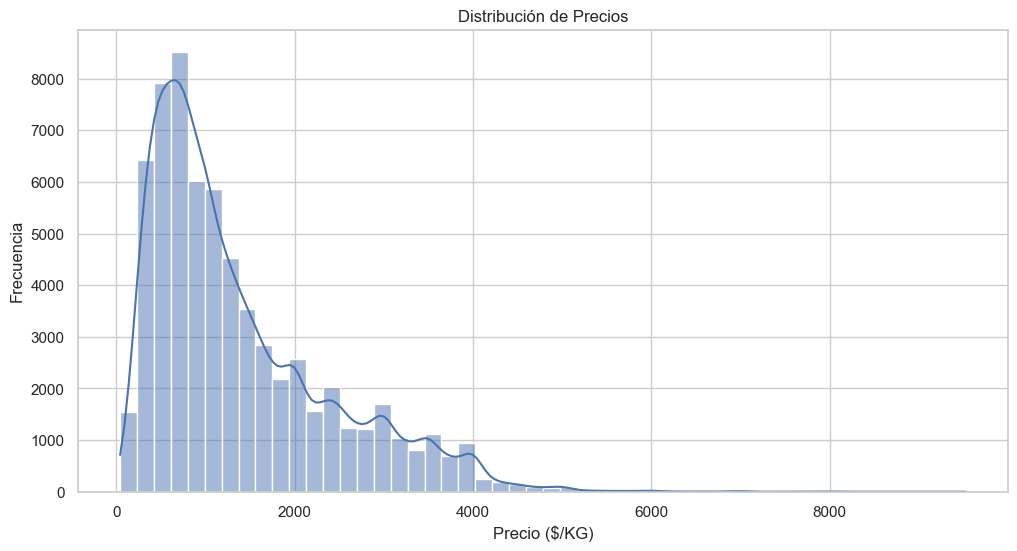

In [13]:
# Histograma de la columna 'Precio'
plt.figure(figsize=(12, 6))
sns.histplot(df['Precio'], bins=50, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio ($/KG)')
plt.ylabel('Frecuencia')
plt.show()

Código para el Mapa de Relaciones


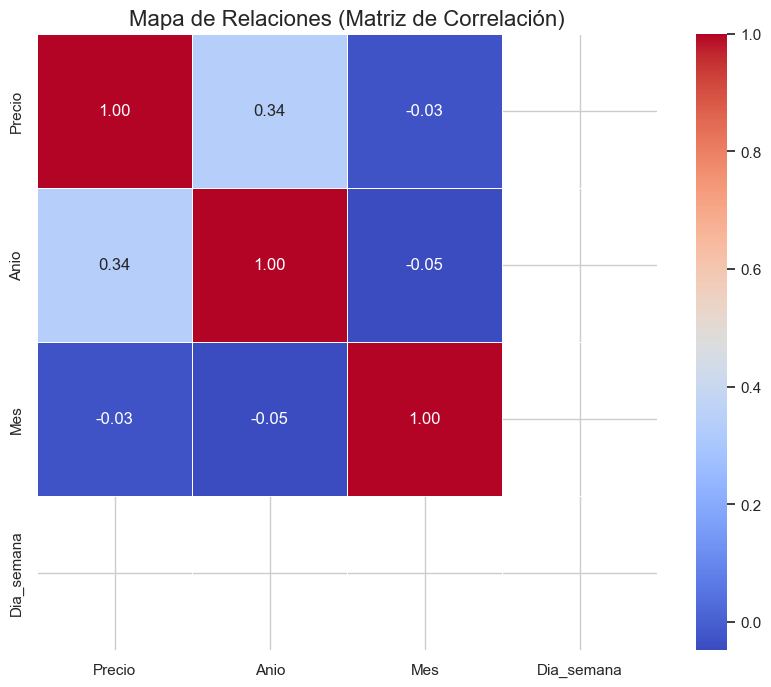

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el conjunto de datos final
# Asegúrate de que la ruta al archivo sea la correcta.
file_path = '../Data/agronet_final.xlsx'
df = pd.read_excel(file_path, parse_dates=['Fecha'])

# 2. Ingeniería de Características a partir de la Fecha
# Extraemos componentes de la fecha que pueden ser relevantes.
df['Anio'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Dia_semana'] = df['Fecha'].dt.dayofweek # Lunes=0, Domingo=6

# 3. Selección de Variables para el Análisis
# Nos enfocaremos en las variables numéricas y de tiempo para la correlación.
# Para incluir 'Mercado' y 'Producto', necesitaríamos convertirlas a números (codificación).
# Empecemos con las variables más directas.
variables_para_correlacion = df[['Precio', 'Anio', 'Mes', 'Dia_semana']]

# 4. Calcular la Matriz de Correlación
correlation_matrix = variables_para_correlacion.corr()

# 5. Visualizar el Mapa de Calor de Correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Relaciones (Matriz de Correlación)', fontsize=16)
plt.show()

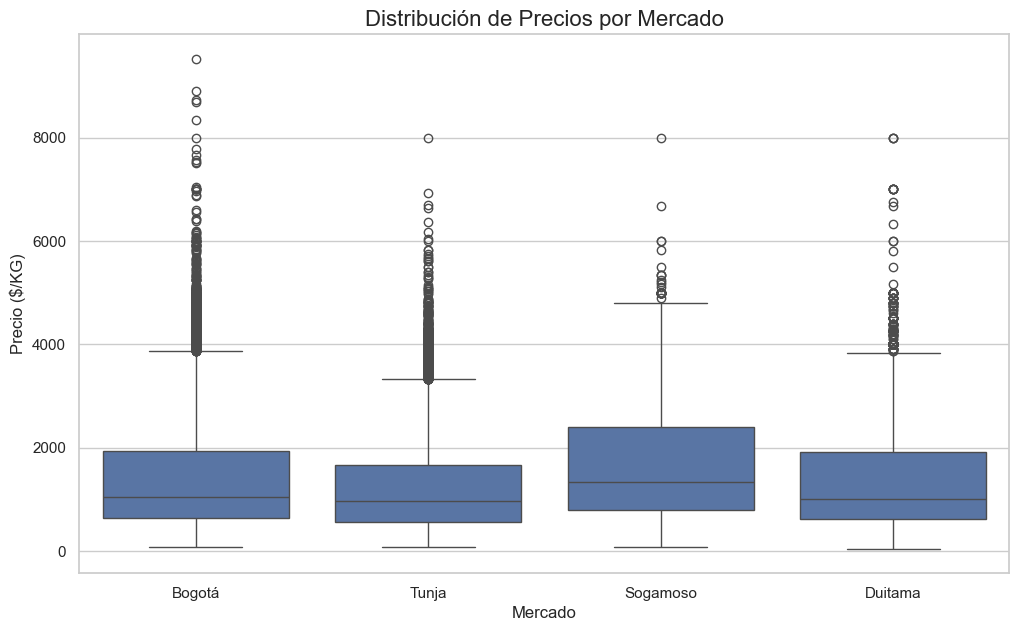

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.boxplot(x='Mercado', y='Precio', data=df)
plt.title('Distribución de Precios por Mercado', fontsize=16)
plt.xlabel('Mercado')
plt.ylabel('Precio ($/KG)')
plt.show()

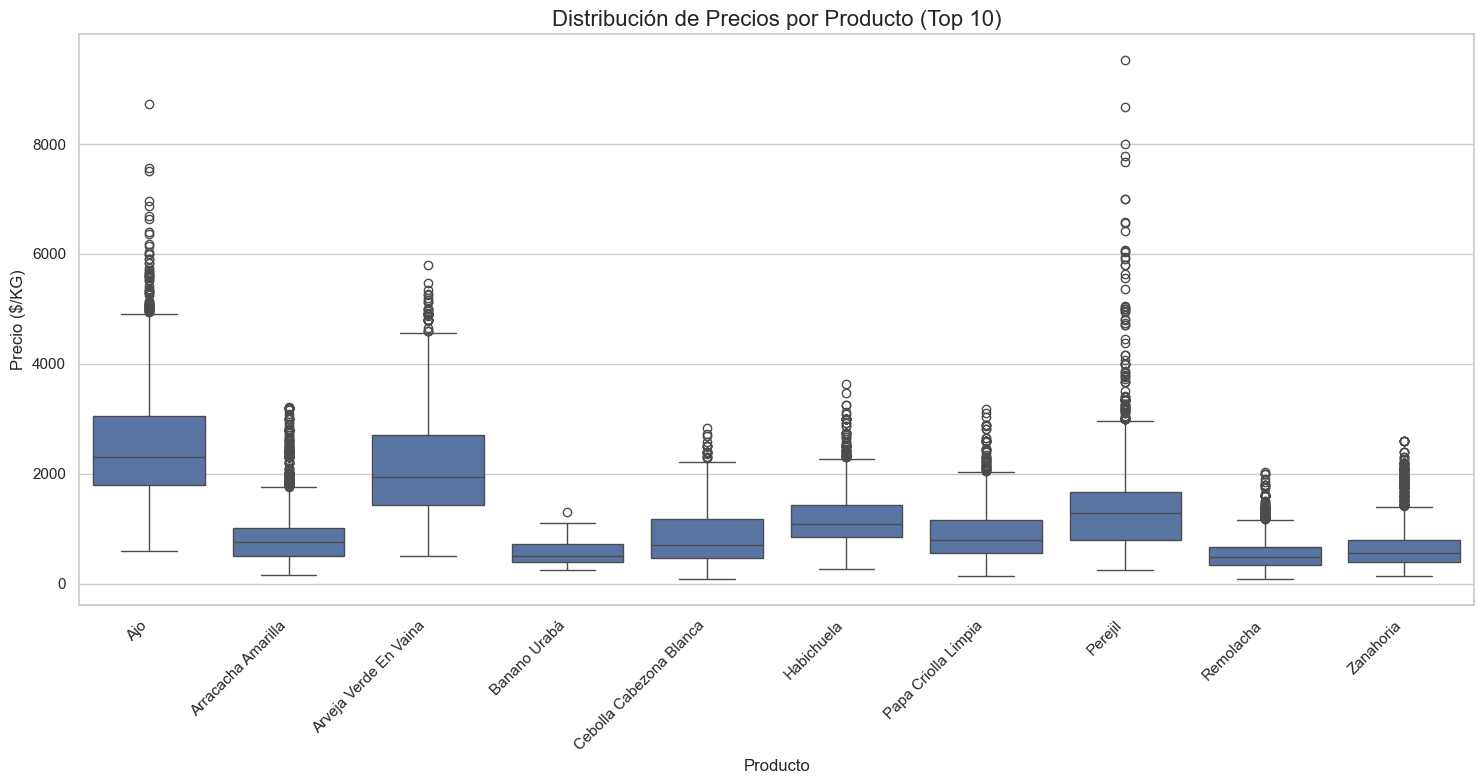

In [16]:
# Encontrar los 10 productos más comunes
top_10_productos = df['Producto'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo esos productos
df_top_productos = df[df['Producto'].isin(top_10_productos)]

# Crear el gráfico de cajas
plt.figure(figsize=(15, 8))
sns.boxplot(x='Producto', y='Precio', data=df_top_productos)
plt.title('Distribución de Precios por Producto (Top 10)', fontsize=16)
plt.xlabel('Producto')
plt.ylabel('Precio ($/KG)')
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas para que no se solapen
plt.tight_layout() # Ajustar el gráfico para que todo sea visible
plt.show()

In [23]:
productos = ['Zanahoria', 'Aguacate papelillo', 'Yuca Llanera']
regiones = ['Tunja', 'Duitama', 'Sogamoso', 'Bogota']

df_filtrado = df[df['Producto'].isin(productos) & df['Mercado'].isin(regiones)]

# Calcular estadísticas descriptivas por producto y región
estadisticas = df_filtrado.groupby(['Producto', 'Mercado'])['Precio'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()

print(estadisticas)

       Producto   Mercado  count        mean  median         std     min  \
0  Yuca Llanera   Duitama    267  642.590412  625.00  139.157578  343.75   
1  Yuca Llanera  Sogamoso    212  620.828396  633.33  103.715746  433.33   
2     Zanahoria   Duitama    428  826.375421  700.00  503.420029  133.33   
3     Zanahoria  Sogamoso    248  838.129032  680.00  440.599022  202.67   
4     Zanahoria     Tunja    687  538.494512  432.53  359.712727  130.93   

       max  
0  1000.00  
1   933.33  
2  2600.00  
3  2160.00  
4  2104.17  
